# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}

\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}

\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

from ainvert import A_invert

In [106]:
def bilinear_interpolation(img, scale_h, scale_w):
    (old_H, old_W) = img.shape
    (new_H, new_W) = (int(old_H*scale_h), int(old_W*scale_w))

    img_upscaled = np.zeros((new_H, new_W), dtype=np.uint8)

    for h in range(new_H):
        for w in range(new_W):
            ind_h, ind_w = int(h/scale_h), int(w/scale_w)

            fA = img[ind_h, ind_w]
            fB = img[ind_h, min(ind_w + 1, old_W - 1)]
            fD = img[min(ind_h + 1, old_H - 1), ind_w]
            fC = img[min(ind_h + 1, old_H - 1), min(ind_w + 1, old_W -1)]

            i = h/scale_h - ind_h
            j = w/scale_w - ind_w

            img_upscaled[h][w] = (np.array([[1 - i, i]]) @ np.array([[fA, fB], [fD, fC]]) @ np.array([[1 - j], [j]]))[0][0]

    return img_upscaled

In [163]:
def bicubic_interpolation(img, scale_h, scale_w):
    def inrange(h, w):
        return 0 <= h < img.shape[0] and 0 <= w < img.shape[1]
    
    def Ax(h, w):
        return (img[h][w+1] - img[h][w-1]) / 2 if inrange(h, w+1) and inrange(h, w-1) else 0
    
    def Ay(h, w):
        return (img[h+1][w] - img[h-1][w]) / 2 if inrange(h+1, w) and inrange(h-1, w) else 0
    
    def Axy(h, w):
        return (img[h+1][w+1] - img[h-1][w] - img[h][w-1] + img[h-1][w-1]) / 4 if inrange(h+1, w+1) and inrange(h-1, w) and inrange(h, w-1) and inrange(h-1, w-1) else 0
    
    (old_H, old_W) = img.shape
    (new_H, new_W) = (int(old_H*scale_h), int(old_W*scale_w))

    img = img.astype(np.int32)
    img_upscaled = np.zeros((new_H, new_W), dtype=np.int32)

    for h in range(new_H):
        for w in range(new_W):
            ind_h, ind_w = int(h/scale_h), int(w/scale_w)

            fA = img[ind_h][ind_w]
            fB = img[ind_h][min(ind_w + 1, old_W - 1)]
            fD = img[min(ind_h + 1, old_H - 1)][ind_w]
            fC = img[min(ind_h + 1, old_H - 1)][min(ind_w + 1, old_W -1)]

            fAx = Ax(ind_h, ind_w)
            fBx = Ax(ind_h, min(ind_w + 1, old_W - 1))
            fDx = Ax(min(ind_h + 1, old_H - 1), ind_w)
            fCx = Ax(min(ind_h + 1, old_H - 1), min(ind_w + 1, old_W - 1))

            fAy = Ay(ind_h, ind_w)
            fBy = Ay(ind_h, min(ind_w + 1, old_W - 1))
            fDy = Ay(min(ind_h + 1, old_H - 1), ind_w)
            fCy = Ay(min(ind_h + 1, old_H - 1), min(ind_w + 1, old_W -1))

            fAxy = Axy(ind_h, ind_w)
            fBxy = Axy(ind_h, min(ind_w + 1, old_W - 1))
            fDxy = Axy(min(ind_h + 1, old_H - 1), ind_w)
            fCxy = Axy(min(ind_h + 1, old_H - 1), min(ind_w + 1, old_W -1))
            
            a = A_invert @ np.array([fA, fB, fD, fC, fAx, fBx, fDx, fCx, fAy, fBy, fDy, fCy, fAxy, fBxy, fDxy, fCxy], dtype=np.float64)
            a = a.reshape((4, 4)).T

            i = h/scale_h - ind_h
            j = w/scale_w - ind_w

            img_upscaled[h][w] = np.array([1, j, j**2, j**3]) @ a @ np.array([1, i, i**2, i**3])

    return np.clip(img_upscaled, 0, 255).astype(np.uint8)

In [154]:
def print_img(img):
    plt.figure(figsize=(img.shape[0]/100,img.shape[1]/100), dpi=200)
    plt.imshow(img, cmap ="gray")
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()

In [155]:
parrot = cv2.imread('parrot.bmp', cv2.IMREAD_GRAYSCALE)
clock = cv2.imread('clock.bmp', cv2.IMREAD_GRAYSCALE)
chessboard = cv2.imread('chessboard.bmp', cv2.IMREAD_GRAYSCALE)

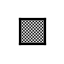

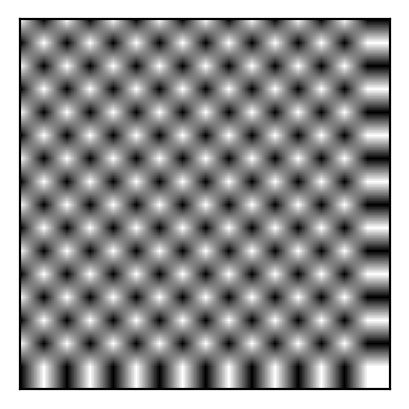

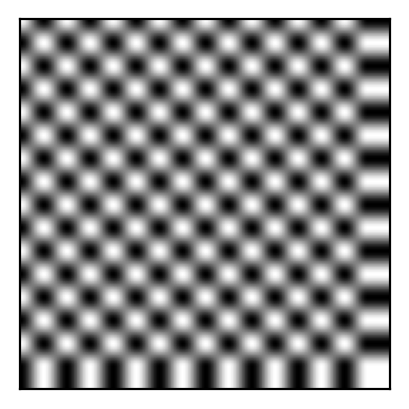

In [164]:
print_img(chessboard)
print_img(bilinear_interpolation(chessboard, 15, 15))
print_img(bicubic_interpolation(chessboard, 15, 15))

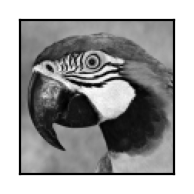

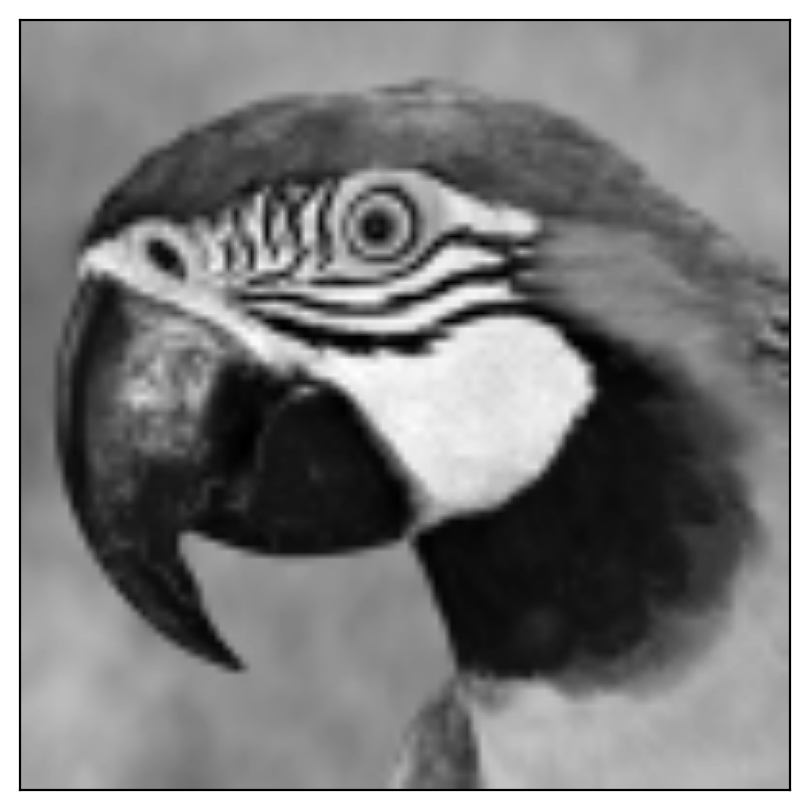

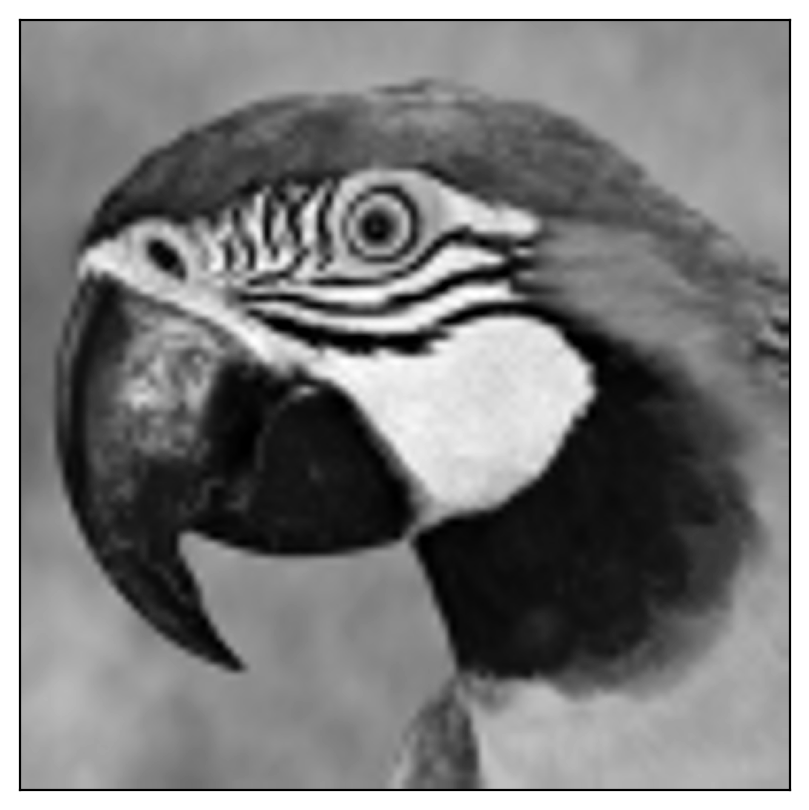

In [166]:
print_img(parrot)
print_img(bilinear_interpolation(parrot, 5, 5))
print_img(bicubic_interpolation(parrot, 5, 5))

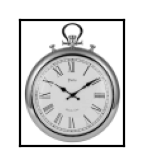

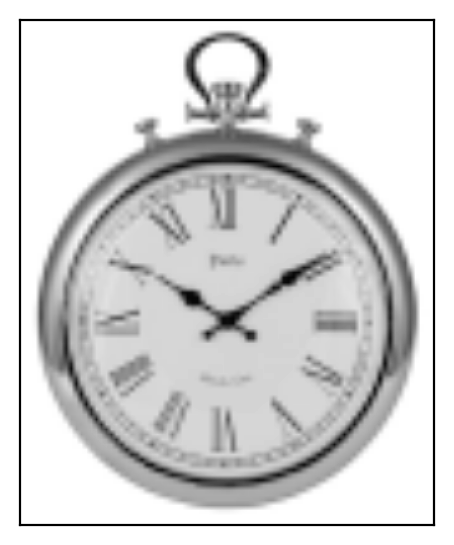

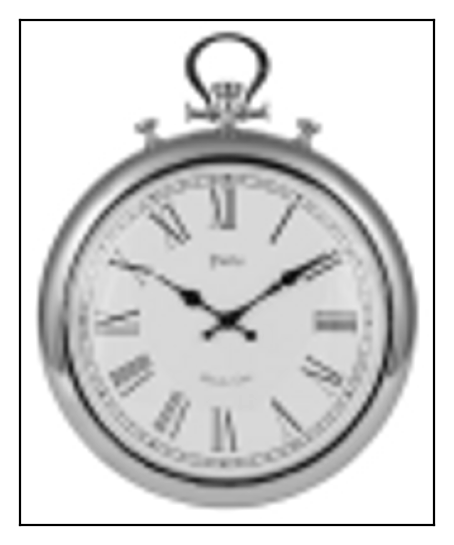

In [168]:
print_img(clock)
print_img(bilinear_interpolation(clock, 4, 4))
print_img(bicubic_interpolation(clock, 4, 4))